## Eigenvectors and Eigenvalues
### Use numpy only
#### Find eigenvalues and eigenvevtors of the following:

$$\begin{bmatrix} 1&0 \\ 0&2 \end{bmatrix}$$
$$\begin{bmatrix} 1&2 \\ 3&-4 \end{bmatrix}$$

In [55]:
import numpy as np
np.set_printoptions(suppress=True, formatter={'float': '{:.8f}'.format})


In [3]:
arr1=np.array([[1,0],[0,2]])
eigen_value,eigen_vector=np.linalg.eig(arr1)
print("eigen_value : \n",eigen_value)
print("eigen_vectors : \n",eigen_vector)

eigen_value : 
 [1. 2.]
eigen_vectors : 
 [[1. 0.]
 [0. 1.]]


In [4]:
arr1=np.array([[1,2],[3,-4]])
eigen_value,eigen_vector=np.linalg.eig(arr1)
print("eigen_value : \n",eigen_value)
print("eigen_vectors : \n",eigen_vector)

eigen_value : 
 [ 2. -5.]
eigen_vectors : 
 [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]


Eig Values:
 [1. 2.] 
Eig Vectors:
 [[1. 0.]
 [0. 1.]]


Eig Values:
 [ 2. -5.] 
Eig Vectors:
 [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]


## Diagonalization
- Use eigen decomposition of the second matrix from the above transformation matrices and apply it 10 times to a vector (-1,1).
- Make sure the same result will be obtained if we apply the original matrix 10 time. use <b>np.linalg.matrix_power()</b>

In [5]:
eigen__vector=np.array(eigen_vector)
diagonal=np.eye(2)*eigen_value
print("eigen__vector",eigen__vector," \n\n Diagonal Matrix :\n",diagonal)

eigen__vector [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]  

 Diagonal Matrix :
 [[ 2. -0.]
 [ 0. -5.]]


In [6]:
v=np.array([[-1],[1]])
v10=eigen__vector@diagonal**10@np.linalg.inv(eigen__vector)@v
print(v10)

[[-4185853.]
 [12555511.]]


In [7]:
## with np.linalg.matrix_power()
arr1=np.array([[1,2],[3,-4]])
v10=np.linalg.matrix_power(arr1,10)@v
v10

array([[-4185853],
       [12555511]])

B Eig Values:
 [ 2. -5.] 
B Eig Vectors:
 [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]


B Diagonal Matrix
 [[ 2.  0.]
 [ 0. -5.]]


Using Diagonalization:
[[-4185853.]
 [12555511.]]


Using power function:
[[-4185853]
 [12555511]]


# PCA Using Eigen Decomposition

### Create a matrix contains the following data

array([[1, 2, 3, 4],
       [5, 5, 6, 7],
       [1, 4, 2, 3],
       [5, 3, 2, 1],
       [8, 1, 2, 2]])

In [274]:
matrix=np.array([[1,2,3,4]
                ,[5,5,6,7]
                ,[1,4,2,3]
                ,[5,3,2,1]
                ,[8,1,2,2]],)

### Step 1: Standardize the dataset (Subtract mean and divide by standard deviation).

In [275]:
means=matrix.mean(axis=0)
stds=matrix.std(axis=0)

print("means : ",means)
print("std : ",stds)

means :  [4.00000000 3.00000000 3.00000000 3.40000000]
std :  [2.68328157 1.41421356 1.54919334 2.05912603]


mean: [4.  3.  3.  3.4]
std : [2.68328157 1.41421356 1.54919334 2.05912603]


In [276]:
stansarized_matrix=(matrix-means)/stds

stansarized_matrix

array([[-1.11803399, -0.70710678, 0.00000000, 0.29138576],
       [0.37267800, 1.41421356, 1.93649167, 1.74831455],
       [-1.11803399, 0.70710678, -0.64549722, -0.19425717],
       [0.37267800, 0.00000000, -0.64549722, -1.16554303],
       [1.49071198, -1.41421356, -0.64549722, -0.67990010]])

Standardized data:
[[-1.11803399 -0.70710678  0.          0.29138576]
 [ 0.372678    1.41421356  1.93649167  1.74831455]
 [-1.11803399  0.70710678 -0.64549722 -0.19425717]
 [ 0.372678    0.         -0.64549722 -1.16554303]
 [ 1.49071198 -1.41421356 -0.64549722 -0.6799001 ]]


### Step 2: Calculate the covariance matrix for the features in the dataset.
#### Use the formula (X.T@X) / n then confirm using np.cov()

In [287]:
covaience_matrix=(stansarized_matrix.T@stansarized_matrix)/5
covaience_matrix

array([[1.00000000, -0.31622777, 0.04811252, -0.18098843],
       [-0.31622777, 1.00000000, 0.63900965, 0.61812254],
       [0.04811252, 0.63900965, 1.00000000, 0.94044349],
       [-0.18098843, 0.61812254, 0.94044349, 1.00000000]])

Using the formula:
[[ 1.         -0.31622777  0.04811252 -0.18098843]
 [-0.31622777  1.          0.63900965  0.61812254]
 [ 0.04811252  0.63900965  1.          0.94044349]
 [-0.18098843  0.61812254  0.94044349  1.        ]]


In [289]:
np.cov(stansarized_matrix.T,ddof=0)

array([[1.00000000, -0.31622777, 0.04811252, -0.18098843],
       [-0.31622777, 1.00000000, 0.63900965, 0.61812254],
       [0.04811252, 0.63900965, 1.00000000, 0.94044349],
       [-0.18098843, 0.61812254, 0.94044349, 1.00000000]])

Using np.cov():
[[ 1.         -0.31622777  0.04811252 -0.18098843]
 [-0.31622777  1.          0.63900965  0.61812254]
 [ 0.04811252  0.63900965  1.          0.94044349]
 [-0.18098843  0.61812254  0.94044349  1.        ]]


### after calculatung cov with np.cov() and with X.T@X it gives the same result 

### Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
### Step 4: Sort eigenvalues and their corresponding eigenvectors.

Eigen Values:
[2.51579324 1.0652885  0.39388704 0.02503121]


Eigen Vectors:
[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


In [292]:
eigen_value,eigen_vector=np.linalg.eig(covaience_matrix)
print("eigen_value : \n",eigen_value)
print("eigen_vectors : \n",eigen_vector)

eigen_value : 
 [2.51579324 1.06528850 0.39388704 0.02503121]
eigen_vectors : 
 [[0.16195986 -0.91705888 -0.30707099 0.19616173]
 [-0.52404813 0.20692161 -0.81731886 0.12061043]
 [-0.58589647 -0.32053940 0.18824970 -0.72009851]
 [-0.59654663 -0.11593512 0.44973251 0.65454704]]


### we get the eigen values dorted from largest to smallest , the largest eigen values mean that thair corresponding eigen vectors has the heighst vaience 

### Step 5: Pick k eigenvalues and form a matrix of eigenvectors.

#### Select the first 2 eigen vectors

array([[ 0.16195986, -0.91705888],
       [-0.52404813,  0.20692161],
       [-0.58589647, -0.3205394 ],
       [-0.59654663, -0.11593512]])

In [293]:
### select 2 eigen vectors 

new_eigen=eigen_vector[:,0:2]
print(new_eigen)

[[0.16195986 -0.91705888]
 [-0.52404813 0.20692161]
 [-0.58589647 -0.32053940]
 [-0.59654663 -0.11593512]]


### Step 6:Transform the original matrix.

Transformed Data:
[[ 0.01565617  0.84520548]
 [-2.8582919  -0.87254925]
 [-0.0575566   1.40104719]
 [ 1.13385419  0.000267  ]
 [ 1.76633814 -1.37397042]]


In [294]:
## make matrix of eigen_values
eigen_value_matrix=np.eye(2)*eigen_value[0:2]
print("eigen_value_matrix \n ",eigen_value_matrix)

eigen_value_matrix 
  [[2.51579324 0.00000000]
 [0.00000000 1.06528850]]


In [295]:
## transform original matrix 
transformed_matrix=stansarized_matrix@new_eigen
print(transformed_matrix)

[[0.01565617 0.84520548]
 [-2.85829190 -0.87254925]
 [-0.05755660 1.40104719]
 [1.13385419 0.00026700]
 [1.76633814 -1.37397042]]


## SVD
### Repeat using SVD and compare the results

V:
[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


Singular Values:
[3.54668383 2.30790869 1.40336568 0.35377402]


U:
[[ 0.00441431  0.36622137  0.74983533 -0.32188415  0.4472136 ]
 [-0.80590547 -0.37806923 -0.08514113 -0.01819405  0.4472136 ]
 [-0.01622829  0.60706353 -0.31602194  0.57562197  0.4472136 ]
 [ 0.31969418  0.00011569 -0.54165203 -0.63593136  0.4472136 ]
 [ 0.49802526 -0.59533136  0.19297977  0.40038759  0.4472136 ]]


Transformed Data:
[[ 0.01565617  0.84520548]
 [-2.8582919  -0.87254925]
 [-0.0575566   1.40104719]
 [ 1.13385419  0.000267  ]
 [ 1.76633814 -1.37397042]]


In [299]:
U,D,V=np.linalg.svd(stansarized_matrix)

In [303]:
print("V \n ",V)

V 
  [[0.16195986 -0.52404813 -0.58589647 -0.59654663]
 [-0.91705888 0.20692161 -0.32053940 -0.11593512]
 [-0.30707099 -0.81731886 0.18824970 0.44973251]
 [0.19616173 0.12061043 -0.72009851 0.65454704]]


In [302]:
print("Singular Values: ",D)

Singular Values:  [3.54668383 2.30790869 1.40336568 0.35377402]


In [305]:
print("U \n ",U)

U 
  [[0.00441431 0.36622137 0.74983533 -0.32188415 0.44721360]
 [-0.80590547 -0.37806923 -0.08514113 -0.01819405 0.44721360]
 [-0.01622829 0.60706353 -0.31602194 0.57562197 0.44721360]
 [0.31969418 0.00011569 -0.54165203 -0.63593136 0.44721360]
 [0.49802526 -0.59533136 0.19297977 0.40038759 0.44721360]]


In [308]:
transformed_matrix=stansarized_matrix@V.T[:,0:2]
transformed_matrix

array([[0.01565617, 0.84520548],
       [-2.85829190, -0.87254925],
       [-0.05755660, 1.40104719],
       [1.13385419, 0.00026700],
       [1.76633814, -1.37397042]])

### after decomposing the natrix with svd and eigrn decompostion it gives the same result when transform the standarized matrix with the results 

# in the next few cell I will try to caluculate SVD manually 

In [311]:
d,v=np.linalg.eig(stansarized_matrix.T@stansarized_matrix/5)
print(d)
v

[2.51579324 1.06528850 0.39388704 0.02503121]


array([[0.16195986, -0.91705888, -0.30707099, 0.19616173],
       [-0.52404813, 0.20692161, -0.81731886, 0.12061043],
       [-0.58589647, -0.32053940, 0.18824970, -0.72009851],
       [-0.59654663, -0.11593512, 0.44973251, 0.65454704]])

In [329]:
eigen_value,u=np.linalg.eig(stansarized_matrix@stansarized_matrix.T/5)
print(eigen_value)
u

[2.51579324 1.06528850 0.39388704 -0.00000000 0.02503121]


array([[-0.00441431, 0.36622137, 0.74983533, 0.44721360, -0.32188415],
       [0.80590547, -0.37806923, -0.08514113, 0.44721360, -0.01819405],
       [0.01622829, 0.60706353, -0.31602194, 0.44721360, 0.57562197],
       [-0.31969418, 0.00011569, -0.54165203, 0.44721360, -0.63593136],
       [-0.49802526, -0.59533136, 0.19297977, 0.44721360, 0.40038759]])

In [340]:
row_norms = np.linalg.norm(stansarized_matrix, axis=1)
row_norms

array([1.35458690, 2.99090165, 1.48472304, 1.38349056, 2.25857323])

In [341]:
root_d=np.sqrt(d)
root_d

C:\Users\H P\AppData\Local\Temp\ipykernel_13240\1390339565.py:1: RuntimeWarning: invalid value encountered in sqrt
  root_d=np.sqrt(d)


array([1.58612523, 1.03212814, 0.62760421, nan, 0.15821255])

In [342]:
### vector norm is so close to eigen calue 

In [320]:
transformed_matrix=stansarized_matrix@v[:,0:2]
transformed_matrix

array([[0.01565617, 0.84520548],
       [-2.85829190, -0.87254925],
       [-0.05755660, 1.40104719],
       [1.13385419, 0.00026700],
       [1.76633814, -1.37397042]])

# conclustion 
### calulating the svd numerically using np.liaalg.svd gives the same vectors of u and v but different singular value 

## Apply the SVD on images
- We will use the SVD to extract the more important features from the image
- Let’s start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

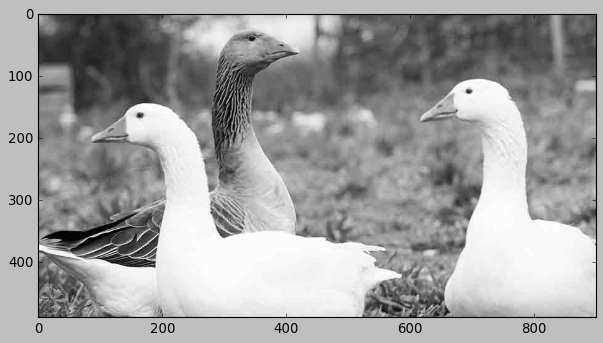

In [323]:
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('classic')
img = Image.open('goose.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

### Find SVD for the image data matrix (imgmat) and check the shape of the matrices (imgmat, U, D, and V.T)

In [324]:
imgmat_shape=imgmat.shape
print("Image matrix",imgmat_shape)

Image matrix (488, 900)


Image matrix shape:
(488, 900)


In [325]:
U,D,V=np.linalg.svd(imgmat)
print("U matrix shape:",U.shape)

U matrix shape: (488, 488)


U matrix shape:
(488, 488)


D matrix shape:
(488,)


In [326]:
print("D matrix shape:",D.shape)

D matrix shape: (488,)


V.T matrix shape:
(900, 900)


In [327]:
print("V.T matrix shape:",V.T.shape)

V.T matrix shape: (900, 900)


In [328]:
U,D,V=np.linalg.svd(imgmat ,full_matrices=False)
print("V.T matrix shape:",V.T.shape)
print("D matrix shape:",D.shape)
print("U matrix shape:",U.shape)

V.T matrix shape: (900, 488)
D matrix shape: (488,)
U matrix shape: (488, 488)


### the matrix decompostion was as follows  u with diminsion m*m  D with m * n and v with diminsion n*n

### Remember:
#### D contains the singular values that need to be put into a diagonal matrix. 
#### Principal components can be obtained from U columns and V.T rows.

#### The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

### Reconstruct the image from the first 2 principal components

In [212]:
def reconstruct_image(n):
    new_D=np.diag(D[:n])
    new_v=V[:n,:]
    new_u=U[:,:n]
    #print(V.shape)
    #print(U.shape)
    #print("new_u",new_u.shape)
    #print("new_D",new_D.shape)
    #print("new_v",new_v.shape)
    new_img=new_u@new_D@new_v
    #print("image_2_component",new_img.shape)
    print("new_img",new_img.shape)
    plt.figure(figsize=(9, 6))
    plt.imshow(new_img, cmap='gray')
    plt.show()

new_img (488, 900)


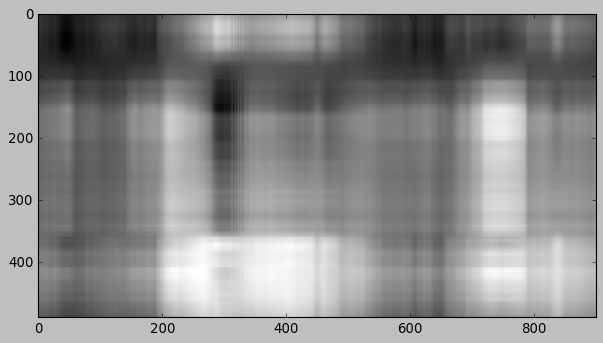

In [215]:
reconstruct_image(2)

### Reconstruct the image from the first 10 principal components

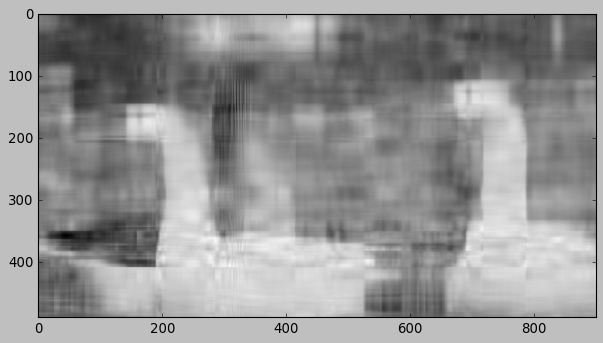

In [179]:
reconstruct_image(10)


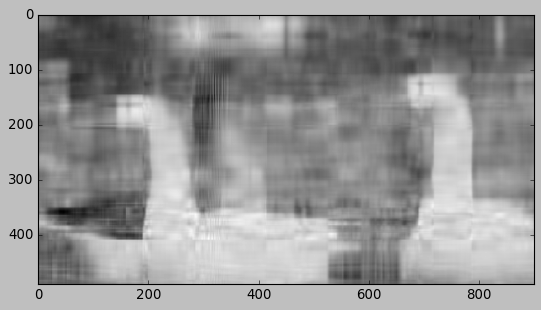

### Reconstruct the image from the first 50 principal components

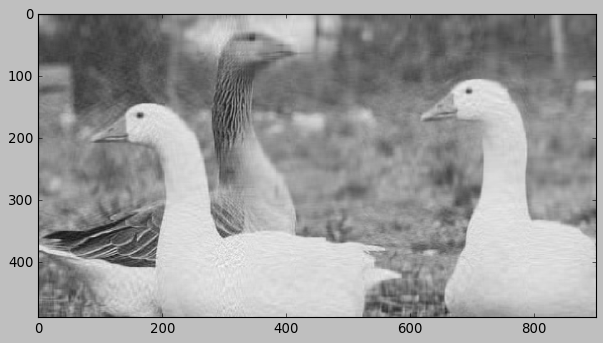

In [180]:
reconstruct_image(50)

In [343]:
### we now can see that when we get larger number of prinicipal components the image become more clear  

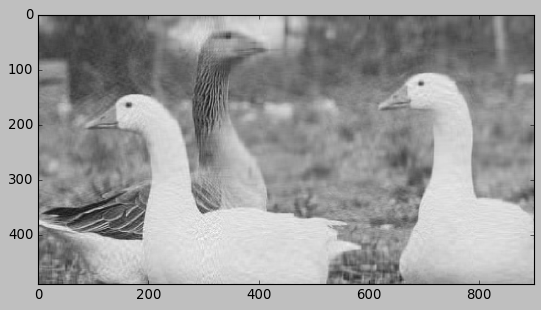

### Reconstruct the image from the first 100 principal components

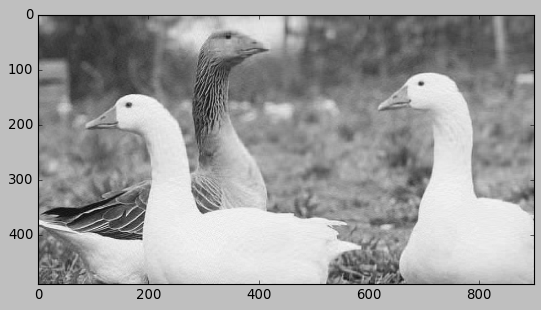

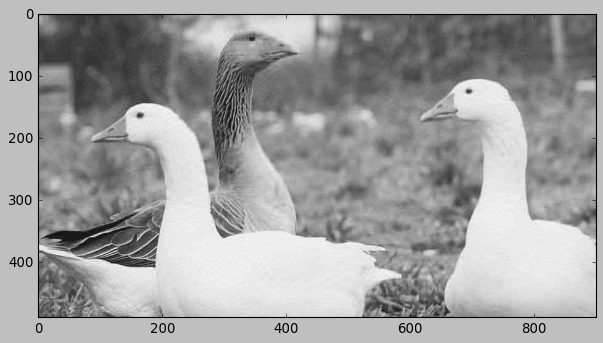

In [181]:
reconstruct_image(100)

### Reconstruct the image from the first 200 principal components

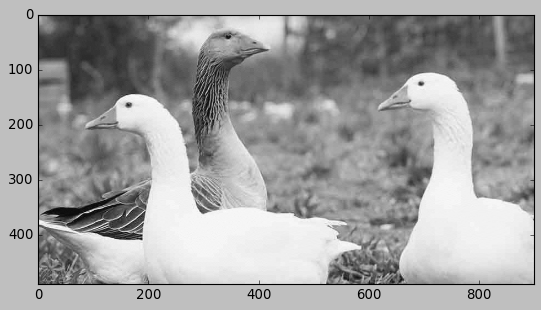

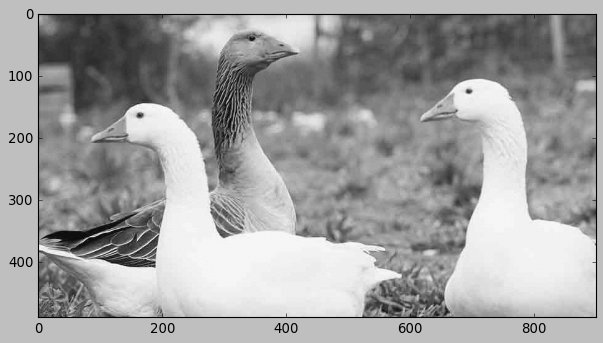

In [182]:
reconstruct_image(200)

### What are the maximum number of components that you can use to reconstruct the image without loosing any information.
### Reconstruct the image using these components and compare the quality with the original image.
### Explain why did you choose this number.
### Can we use 500 principal components to reconstruct the image? Why?

In [344]:
# Image with full number of principal components

In [345]:
# Original image

In [346]:
matrix_rank=np.linalg.matrix_rank(imgmat)
print(matrix_rank)

488


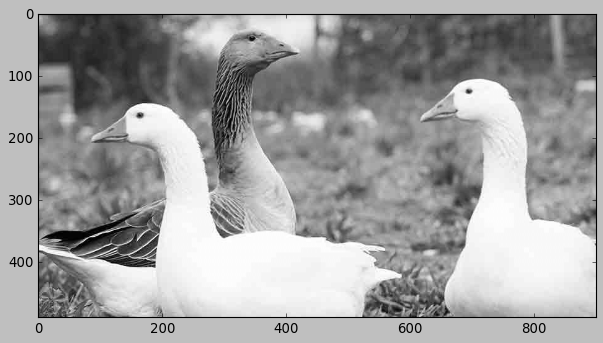

In [186]:
# Image with full number of principal components
reconstruct_image(matrix_rank)

### the best number of components to reconstruct the image is the matrix rank which represent the numper of indepentent components in the image 
### if we construct the image with the matrix rank we will get the same quality as the original image

new_img (488, 900)


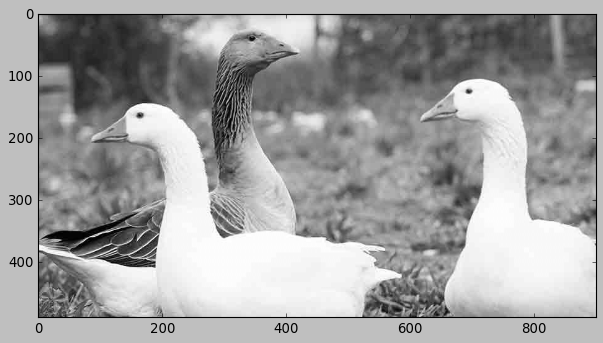

In [197]:
reconstruct_image(500)

# we can not use 500 principle components as it larger than number of singular values and larger than number of rows  

## PCA Practical Exercise
- In this example we will use a real data and apply PCA as a dimensionality reduction method.
- <b>Note that,</b> in the following exercise we will use the numpy linear algebra package and numpy arrays to perform our task. However, in the future you will use <b>sklearn ML library and pandas data frame</b> which are more practically used in the work environment.

### Use the following code to load your data and print out its description

In [217]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.keys())

print(cancer['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

### Use the following code to save the input features into numpy array

In [219]:
Data = cancer['data']

### Check out the shape of the data matrix

(569, 30)

In [220]:
print(Data.shape)

(569, 30)


### Display a scatter plot between the first feature (first column. i.e. index 0) and the second feature (second column. i.e. index 1)  

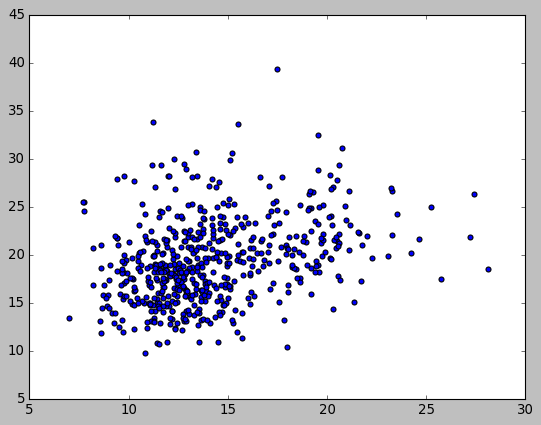

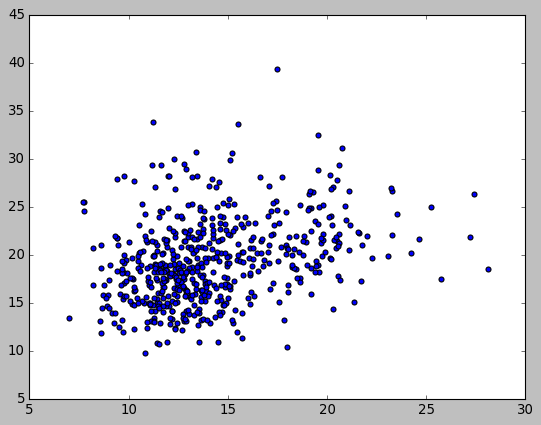

In [221]:
plt.scatter(Data[:,0],Data[:,1])

### there is acorrelation between these 2 features

### Display a scatter plot between the first feature (first column. i.e. index 0) and the 23rd feature (23rd column. i.e. index 22)  

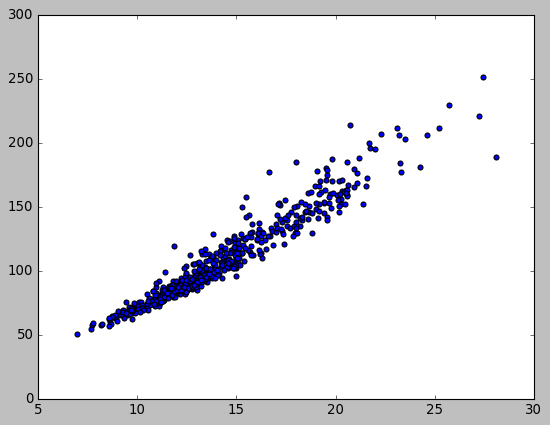

### there is a large correlation between these 2 features 

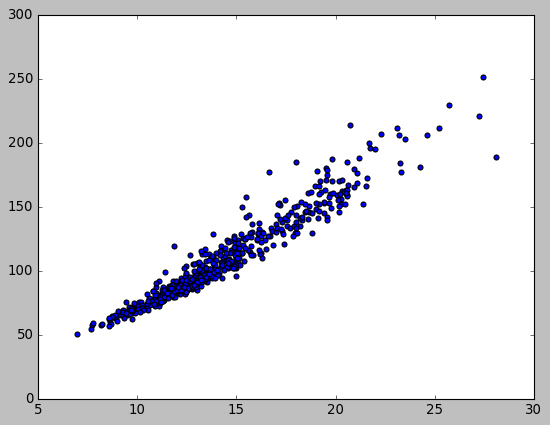

In [348]:
plt.scatter(Data[:,0],Data[:,22])

### Display a scatter plot between any other two features (columns of your chice)

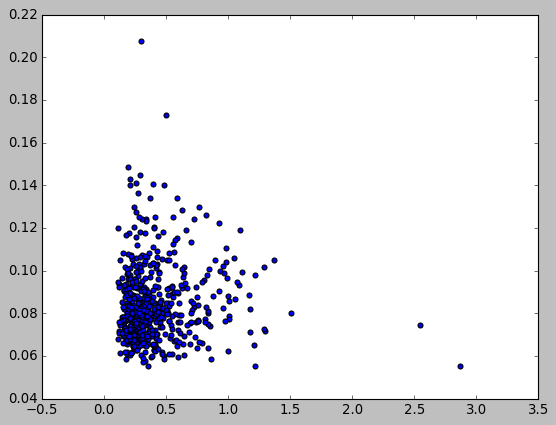

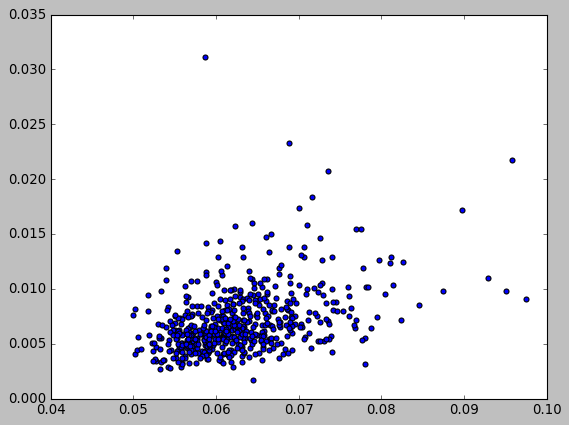

In [228]:
plt.scatter(Data[:,9],Data[:,14])

In [349]:
### there is some some correlation between most of the featues in our data set 

### Standrdize the data (Subtract mean and divide by standard deviation ddof = 0)

mean:
 [ 14.12729174  19.28964851  91.96903339 654.88910369   0.09636028
   0.10434098   0.08879932   0.04891915   0.18116186   0.06279761
   0.40517206   1.21685343   2.86605923  40.33707909   0.00704098
   0.02547814   0.03189372   0.01179614   0.0205423    0.0037949
  16.26918981  25.6772232  107.26121265 880.5831283    0.13236859
   0.25426504   0.27218848   0.11460622   0.29007557   0.08394582]

std :
 [  3.52095076   4.29725464  24.27761929 351.60475406   0.01405176
   0.05276633   0.07964973   0.03876873   0.02739018   0.00705416
   0.27706894   0.55116343   2.0200771   45.45101342   0.00299988
   0.01789244   0.03015952   0.00616486   0.0082591    0.00264374
   4.82899258   6.14085432  33.57300157 568.85645895   0.02281236
   0.15719817   0.20844087   0.06567455   0.06181308   0.01804539]

Standardized data:
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988

In [239]:
data_mean=Data.mean(axis=0)
print("data_mean",data_mean.shape)
data_std=Data.std(axis=0)
print("data_std",data_std.shape)
print("data_shape",Data.shape)
data_standarized=(Data-data_mean)/data_std
print("data_standarized",data_standarized.shape)

data_mean (30,)
data_std (30,)
data_shape (569, 30)
data_standarized (569, 30)


In [232]:
data_standarized

array([[1.09706398, -2.07333501, 1.26993369, ..., 2.29607613, 2.75062224,
        1.93701461],
       [1.82982061, -0.35363241, 1.68595471, ..., 1.08708430,
        -0.24388967, 0.28118999],
       [1.57988811, 0.45618695, 1.56650313, ..., 1.95500035, 1.15225500,
        0.20139121],
       ...,
       [0.70228425, 2.04557380, 0.67267578, ..., 0.41406869, -1.10454895,
        -0.31840916],
       [1.83834103, 2.33645719, 1.98252415, ..., 2.28998549, 1.91908301,
        2.21963528],
       [-1.80840125, 1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Find the covariance matrix of the standardized data and print its shape ddof = 0

(30, 30)

In [241]:
data_standarized.shape

(569, 30)

In [244]:
data_cov_matrix=np.cov(data_standarized.T)
data_cov_matrix.shape

(30, 30)

### Find eigen values and eigen vectors of the covariance matrix and print eigen values.

In [245]:
eigen_value,eigen_vector=np.linalg.eig(data_cov_matrix)

In [246]:
eigen_value

array([13.30499079, 5.70137460, 2.82291016, 1.98412752, 1.65163324,
       1.20948224, 0.67640888, 0.47745625, 0.41762878, 0.35131087,
       0.29443315, 0.26162116, 0.24178242, 0.15728615, 0.09430070,
       0.08000340, 0.05950361, 0.05271142, 0.04956470, 0.00013328,
       0.00075012, 0.00159214, 0.00691261, 0.00819204, 0.01550853,
       0.01808679, 0.02438369, 0.02748771, 0.03121426, 0.03002566])

In [260]:
eigen_vector.shape

(30, 30)

array([13.28160768,  5.69135461,  2.81794898,  1.98064047,  1.64873055,
        1.20735661,  0.67522011,  0.47661714,  0.41689481,  0.35069346,
        0.2939157 ,  0.26116137,  0.2413575 ,  0.15700972,  0.09413497,
        0.0798628 ,  0.05939904,  0.05261878,  0.04947759,  0.00013304,
        0.0007488 ,  0.00158934,  0.00690046,  0.00817764,  0.01548127,
        0.01805501,  0.02434084,  0.0274394 ,  0.0311594 ,  0.02997289])

### How much explained variance if we used 2,3,4,5,6 principal components?
### Can you guess the major principal components?

In [253]:
def calculate_explained_varience(n):
    print(f'Explained varinace % ({n} PCs:)')
    explianed_vaience=eigen_value[0:n].sum()/eigen_value.sum()*100
    print(explianed_vaience)

In [254]:
calculate_explained_varience(2)

Explained varinace % (2 PCs:)
63.243207651559445


Explained varinace % (2 PCs:)
63.24320765155945


In [255]:
calculate_explained_varience(3)

Explained varinace % (3 PCs:)
72.63637090899083


Explained varinace % (3 PCs:)
72.63637090899086


In [256]:
calculate_explained_varience(4)

Explained varinace % (4 PCs:)
79.23850582446096


Explained varinace % (4 PCs:)
79.23850582446099


In [257]:
calculate_explained_varience(5)

Explained varinace % (5 PCs:)
84.73427431680723


Explained varinace % (5 PCs:)
84.73427431680724


In [258]:
calculate_explained_varience(6)

Explained varinace % (6 PCs:)
88.75879635669058


Explained varinace % (6 PCs:)
88.75879635669058


###  we can see that using more principle components we get more varience of the data 
## also can see that most of the data varience locate in the first 3 principle components 

### Use the first two PCs and transform you data (using projection)

In [261]:
data_of_2_component=data_standarized@eigen_vector[:,0:2]
data_of_2_component.shape

(569, 2)

### Show a scatter plot of the transformed data (Notice the graph)

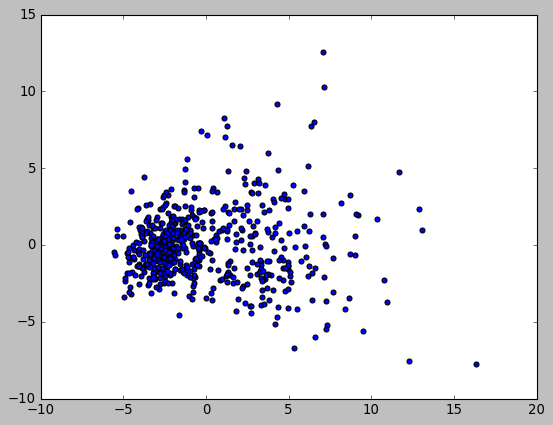

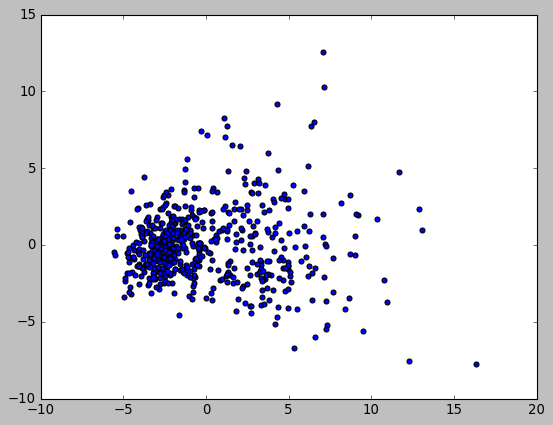

In [262]:
plt.scatter(data_of_2_component[:,0],data_of_2_component[:,1])

### Find the correlation and covariance matrices for the transformed data. (Notice the results)

In [267]:
cov_2_component=np.cov(data_of_2_component.T)
cov_2_component

array([[13.30499079, 0.00000000],
       [0.00000000, 5.70137460]])

In [270]:
corr_2_component=np.corrcoef(data_of_2_component.T)
corr_2_component

array([[1.00000000, 0.00000000],
       [0.00000000, 1.00000000]])

### after calculating correlaion between the 2 principle componants its clear that they are fully indepedant 


### PCA returns independent compnents with the maximum varience in the data 

Correlation Matrix:
[[1. 0.]
 [0. 1.]]


Covariance Matrix:
[[13.30499079  0.        ]
 [ 0.          5.7013746 ]]


## Congratulations 
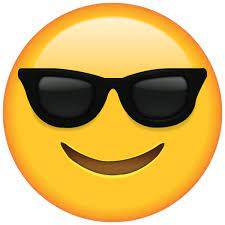